# **Clasificación Espectral I**
## **Ecuaciones de Boltzmann y Saha**

Resumen

La Ecuación de Saha establece cual es la abundancia de iones de un elemento químico en cierto grado de ionización, con respecto a la abundancia de iones en un grado de ionización menor. Ese cociente depende de la temperatura del medio (T ) y de la presión de los electrones libres (Pe ):

\begin{equation}
        \frac{n_{i+1}}{n_i} = \frac{1}{n_e} \left( \frac{2 \pi m_e k T}{ h^2}
        \right)^{3/2} 2 \frac{\chi_{i+1}}{\chi_{i}} ~e^{-\frac{E_{ion}}{kT}} \nonumber
      \end{equation}

Suponiendo que el gas de electrones es un gas ideal, la presión es Pe = ne kT .
La Ecuación de Boltzmann, por otro lado, permite determinar la relación entre cantidades de un mismo átomo/especie según sus estados de excitación, en función de la temperatura:

\begin{equation}
    \frac{N_{j}}{N_i} = \frac{g_j}{g_i}~ e^{-\frac{E_{j}-E_{i}}{kT}} \nonumber
      \end{equation}
en donde el factor $g_{i}$ representa el estado de degeneración del nivel $i$.


**1. Introducción**

Defina/describa cada una de las cantidades que aparecen en las ecuaciones de Boltzmann y Saha. Para ello, repase lo visto en la teoría, o lea la bibliografía
de la Unidad.


**2. Ejercicios**

**Determinación de la ionización de Silicio**

Estudie la ionización del silicio en el rango de temperaturas 3000–30 000 K, suponiendo que la presión electrónica es constante e igual a 100 barias (1 bar= dina/cm$^2$). Derive la fracción de Si I, II, III, IV y V con respecto al número
total de átomos de Silicio como función de la temperatura y grafique los resultados. Para esto, considere que el número total de átomos de Silicio es la suma de todos los iones, independientemente de su estado de ionización. En la Fig. 1 se puede ver un esquema de la dependencia de la intensidad de diferentes lineas espectrales respecto a la temperatura efectiva/tipo espectral.

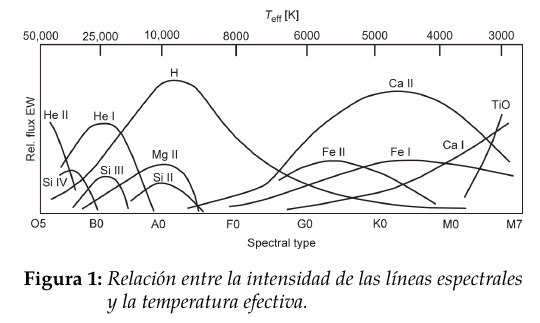


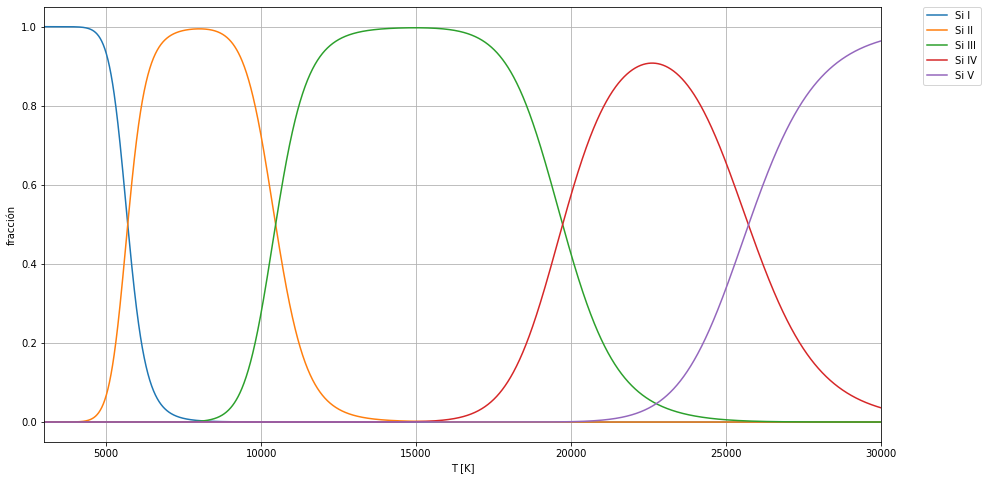

In [ ]:
# Resuelvo Saha para el Si
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]
#
# Debo redefinir potenciales y otras cosas
k = 1.38E-23             # J/K
h = 6.63E-34             # J s
me = 9.11E-31            # kg 
E1=8.151683*1.60218e-19  # J
E2=16.34585*1.60218e-19  # J
E3=33.493*1.60218e-19    # J
E4=45.14179*1.60218e-19  # J
Pe=10.0                  # N/m2 varía entre 0.1 a 100 (de frías a calientes) 1 dina/cm2 = 0.1 N/m2
#
# Defino funciones de partición
#
Si1=1.0
Si2=1.0
Si3=1.0
Si4=1.0
Si5=1.0
#
# Defino rango de temperaturas
x = np.arange(1000,30000,10)
#
a21=np.power(2*np.pi*me*k*x/(h*h),1.5)*np.exp(-E1/(k*x))*(Si2/Si1)*2*k*x/Pe
a32=np.power(2*np.pi*me*k*x/(h*h),1.5)*np.exp(-E2/(k*x))*(Si3/Si2)*2*k*x/Pe
a43=np.power(2*np.pi*me*k*x/(h*h),1.5)*np.exp(-E3/(k*x))*(Si4/Si3)*2*k*x/Pe
a54=np.power(2*np.pi*me*k*x/(h*h),1.5)*np.exp(-E4/(k*x))*(Si5/Si4)*2*k*x/Pe
#
f=1+a21+a21*a32+a21*a32*a43+a21*a32*a43*a54
f1=1.0/f
f2=a21/f
f3=a21*a32/f
f4=a21*a32*a43/f
f5=a21*a32*a43*a54/f
#
plt.plot(x, f1, label='Si I')
plt.plot(x, f2, label='Si II')
plt.plot(x, f3, label='Si III')
plt.plot(x, f4, label='Si IV')
plt.plot(x, f5, label='Si V')
plt.xlim(3000,30000)
plt.grid(True)
plt.xlabel('T [K]')
plt.ylabel('fracción')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

**La ley de Saha y los tipos espectrales**

Suponiendo que la máxima intensidad de los diferentes iones se encuentra en los siguientes tipos espectrales:

       Si I     G5
       Si II    A0
       Si III   B1
       Si IV    O9

Obtenga las temperaturas correspondientes a dichos tipos espectrales, a partir de los máximos encontrados en el gráfico del ejercicio anterior.


In [ ]:
#
# Busco los máximos de cada distribución (debe ejecutar el código anterior para generar las funciones correspondientes)
#
xmax1 = x[np.argmax(f1)]
xmax2 = x[np.argmax(f2)]
xmax3 = x[np.argmax(f3)]
xmax4 = x[np.argmax(f4)]
#xmax5 = x[np.argmax(f5)]
#
print ('El SiI tiene máximo en:', xmax1, 'K')
print ('El SiII tiene máximo en:', xmax2, 'K')
print ('El SiIII tiene máximo en:', xmax3, 'K')
print ('El SiIV tiene máximo en:', xmax4, 'K')
#print ('El SiV tiene máximo en:', xmax5, 'K')

El SiI tiene máximo en: 1000 K
El SiII tiene máximo en: 8010 K
El SiIII tiene máximo en: 14960 K
El SiIV tiene máximo en: 22610 K


**Aplicación de la Ley de Saha**

Compare una estrella G5 III y una G5 V. Suponga que la presión y temperatura en las atmósferas de dichas estrellas son:

           CL     T [K]        Pe [barias]
          III     4700          1
           V      5400         20

y calcule la ionización del hierro (Fe) y estroncio (Sr),
usando los siguientes datos:

       Elemento   Eion [ev]      χ0         χ1
       Fe         7.87           25         30
       Sr         5.69            1          2

Comente cómo puede utilizarse el resultado obtenido en el punto anterior para la clasificación espectral.


In [ ]:
import pandas as pd
import numpy as np
# Debo definir constantes
k = 1.38E-23             # J/K
h = 6.63E-34             # J s
me = 9.11E-31            # kg 
#
# planteo sendas ecuaciones para hierro y estroncio
#
Fe1 = 30
Fe0 = 25
EFe = 7.87*1.60218e-19
#
Sr1 = 2
Sr0 = 1
ESr = 5.69*1.60218e-19
#
def Fe10(T, Pe):
  return np.power(2*np.pi*me*k*T/(h*h),1.5)*np.exp(-EFe/(k*T))*(Fe1/Fe0)*2.0*k*T/Pe
def Sr10(T,Pe):
  return np.power(2*np.pi*me*k*T/(h*h),1.5)*np.exp(-ESr/(k*T))*(Sr1/Sr0)*2.0*k*T/Pe
# Calculo para cada temperatura y presiones
T = 4700
Pe = 0.1 # para pasarlo a N/m2
FeIII = Fe10(T,Pe)
SrIII = Sr10(T,Pe)
print ('Suponiendo una T=', T, 'y una presión Pe=', Pe, 'se obtiene una relación de FeII/FeI=', Fe10(T,Pe), 'y SrII/SrI=', Sr10(T,Pe))
#
T = 5400
Pe = 2 # para pasarlo a N/m2
print ('Suponiendo una T=', T, 'y una presión Pe=', Pe, 'se obtiene una relación de FeII/FeI=', Fe10(T,Pe), 'y SrII/SrI=', Sr10(T,Pe))
FeV = Fe10(T,Pe)
SrV = Sr10(T,Pe)
print ('Es decir que la relación entre ionizaciones para el Fe es', FeIII/FeV, 'y la del Sr es', SrIII/SrV)

Suponiendo una T= 4700 y una presión Pe= 0.1 se obtiene una relación de FeII/FeI= 4.35738735554646 y SrII/SrI= 1584.0847914929839
Suponiendo una T= 5400 y una presión Pe= 2 se obtiene una relación de FeII/FeI= 3.8316899804790583 y SrII/SrI= 693.0703975549915
Es decir que la relación entre ionizaciones para el Fe es 1.1371972622382347 y la del Sr es 2.285604459635423


**Una atmósfera de puro H**

Considere una atmósfera estelar constituida completamente por hidrógeno. Calcule y grafique la fracción de átomos neutros con electrones en el estado n = 2 (N2), respecto del total de átomos neutros e ionizados (N$_{total}$ = HI + HII). 

Considere: $g_n$ = 2$n^2$, $P_e$ = 200 bar.
Compare con la Fig. 1. ¿A qué temperatura se da el máximo de la curva y con cuál tipo espectral puede asociarlo? Explique qué fenómeno domina hacia
temperaturas mayores y cuál, hacia menores.


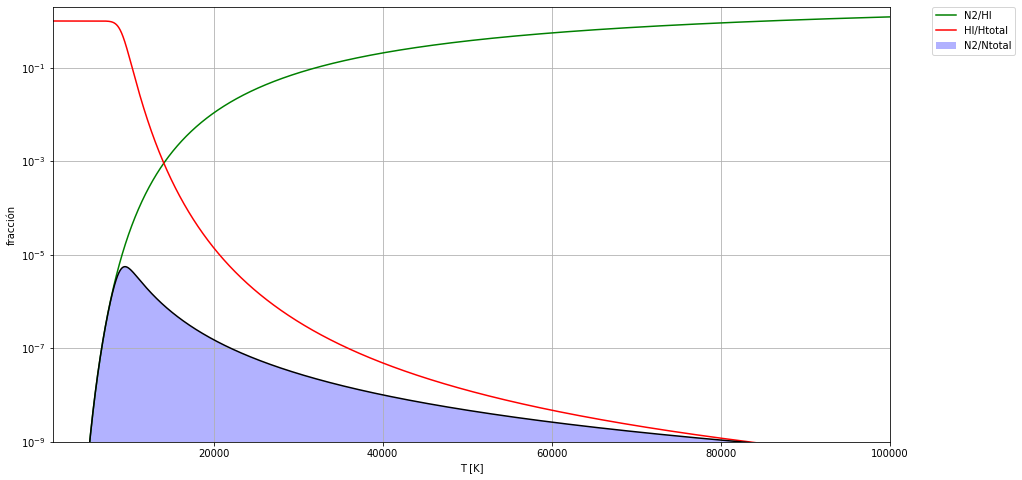

La relación máxima de N2/Ntotal ocurre en: 9530 K


In [ ]:
#
# Calculo cantidad de hidrógenos con electrones en n=2 respecto al total
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]
#
#Defino variables
H2 = 1.0
H1 = 2.0
E1 = 2.17896E-18   # J
k = 1.38E-23       # J/K
h = 6.63E-34       # J s
me = 9.11E-31      # kg 
c = 299792458      # m/s
Pe = 10            # N/m2 
SUPE = 2.0
INFE = 1.0
#
# Defino rango de temperaturas
x = np.arange(1000,100000,10)
#
# Boltzmann
bolt = ((2*SUPE*SUPE)/H1)*np.exp(-E1*(-1.0/(SUPE*SUPE)+1.0/(INFE*INFE))/(k*x))
# Saha
saha = np.power(2.0*np.pi*me*k*x/(h*h),1.5)*np.exp(-E1/(k*x))*2.0*(H2/H1)*k*x/Pe
# fracción de átomos neutros respecto del total
neutros=1.0/(1.0+saha)
#
# Fracción de átomos de H con electrones en nivel 2 respecto del total 
#
N2 = bolt*neutros
#
# Ploteo lo que quiero
#
plt.plot(x,bolt, c='green', label='N2/HI')
plt.plot(x,neutros, c='red', label='HI/Htotal')
plt.fill_between(x,0, N2, facecolor='blue', alpha=0.3, label ='N2/Ntotal')
plt.plot(x, N2, c='black')
# Un poco de arte ...
plt.ylim(1E-9,2)
plt.xlim(1000,100000)
plt.yscale('log')
plt.grid(True)
plt.xlabel('T [K]')
plt.ylabel('fracción')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#
plt.show()

xmax = x[np.argmax(N2)]
print ('La relación máxima de N2/Ntotal ocurre en:', xmax, 'K')